# **News Headlines Classification**



Dataset Source:-

https://archive.ics.uci.edu/ml/datasets/News+Aggregator

Aggregation of 422,937 news classified under business, science & technology, entertainment and health categories. 

Content
The columns included in this dataset are:

ID : the numeric ID of the article

TITLE : the headline of the article

URL : the URL of the article

PUBLISHER : the publisher of the article

CATEGORY : the category of the news item; one of:
-- b : business
-- t : science and technology
-- e : entertainment
-- m : health

STORY : alphanumeric ID of the news story that the article discusses

HOSTNAME : hostname where the article was posted

TIMESTAMP : approximate timestamp of the article's publication, given in Unix time (seconds since midnight on Jan 1, 1970)

In [ ]:
import re
import numpy as np 
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer

# function for encoding categories
from sklearn.preprocessing import LabelEncoder

## Loading dataset

In [ ]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/condensed-uci-news-aggregator.csv'

--2022-08-27 08:03:05--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/condensed-uci-news-aggregator.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25862855 (25M) [text/plain]
Saving to: ‘condensed-uci-news-aggregator.csv’

condensed-uci-news- 100%[===================>]  24.66M  --.-KB/s    in 0.1s    

2022-08-27 08:03:06 (232 MB/s) - ‘condensed-uci-news-aggregator.csv’ saved [25862855/25862855]



In [ ]:
news = pd.read_csv("condensed-uci-news-aggregator.csv")

In [ ]:
news.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   TITLE     422419 non-null  object
 1   CATEGORY  422419 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


## Data preprocessing

In [ ]:
def normalize_text(s):
    s = s.lower()
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    
    # make sure we didn't introduce any double spaces
    s = re.sub('\s+',' ',s)
    
    return s

news['TEXT'] = [normalize_text(s) for s in news['TITLE']]

Okay now let's get our data into a format where it will play nicely with the classifier.

In [ ]:
news

,TITLE,CATEGORY,TEXT
0,"Fed official says weak data caused by weather,...",b,fed official says weak data caused by weather ...
1,Fed's Charles Plosser sees high bar for change...,b,fed's charles plosser sees high bar for change...
2,US open: Stocks fall after Fed official hints ...,b,us open stocks fall after fed official hints a...
3,"Fed risks falling 'behind the curve', Charles ...",b,fed risks falling behind the curve' charles pl...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed's plosser nasty weather has curbed job growth
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeons to remove 4-year-old's rib to rebuild...
422415,Boy to have surgery on esophagus after battery...,m,boy to have surgery on esophagus after battery...
422416,Child who swallowed battery to have reconstruc...,m,child who swallowed battery to have reconstruc...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergoes surgery to repair throat...


## Count Vectorizer

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(news['TEXT'])

## Label Encoding

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(news['CATEGORY'])

## **Data Visualization**

## Wordcloud
The size of word indicate its importance.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


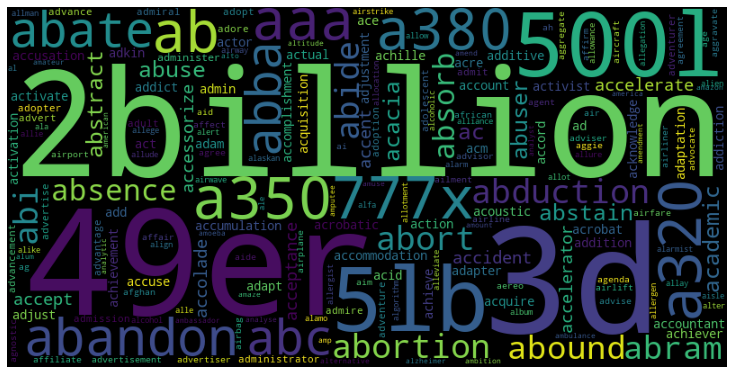

In [ ]:
for_wordcloud = vectorizer.get_feature_names()
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

## Creating training and testing datasets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Multinomial Naive Bayes Model

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
mnb.score(x_test, y_test)

0.9257966005397472

## Bernoulli Naive Bayes Model

In [ ]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_test, y_test)

0.9256663983712893

## Predicting unseen messages

In [ ]:
text_message=[
    "New 'Game of Thrones' Season 4 Trailer: ""I Will Answer Injustice with Justice!",
     "Bitcoin exchange files for bankruptcy",
     "ECB's Noyer: Low inflation may hamper adjustment"]

msg = vectorizer.transform(text_message)
print("prediction from model: {}".format(mnb.predict(msg)))

prediction from model: [1 0 0]


As we can see from prediction, we have got the output in array as [1,0,0] of categories which we have label encoded for class mapping in alphabetical order , this simply means the first text is predicted as 1 means its e i.e. Entertainment type of article news, then in second text predicts as 0 means its b i.e. Business type of article and third text predicts as 0 means its also b i.e. Business type of article. 